In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use(style='seaborn')

df=pd.read_csv('C:\\Users\\Lenovo\\Documents\\NLP_LAB_55\\all-data.csv',encoding = "ISO-8859-1")
print(df.head())
df.info()

    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                               
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column

In [4]:
df.isna().sum()


neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [5]:
df['neutral'].value_counts()

neutral
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

In [6]:
y=df['neutral'].values
y.shape

(4845,)

In [7]:
x=df['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'].values

In [8]:
x.shape

(4845,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1938,)

In [11]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

In [12]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'neutral'})
df_train=pd.concat([df1,df2],axis=1)

In [13]:
df_train.head()

,news,neutral
0,Eriikka S+¦derstr+¦m has previously held sever...,neutral
1,"( ADP News ) - Dec 11 , 2008 - Finnish constru...",positive
2,have notified that as a result of the Company ...,negative
3,`` We hope to clarify our policies to Finnish ...,neutral
4,M-real will start statutory employer-employee ...,neutral


In [14]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

In [15]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [16]:
df_test.head()

,news,neutral
0,"When open next year , it will be the largest f...",neutral
1,Comptel Corporation will publish its financial...,positive
2,Feed companies Suomen Rehu and Raisio do no im...,negative
3,"In 2009 , Fiskars ' cash flow from operating a...",neutral
4,"Teollisuuden Voima Oyj , the Finnish utility k...",neutral


In [17]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [19]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [20]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,neutral
0,Eriikka S¦derstr¦m has previously held several...,neutral
1,ADP News Dec 11 2008 Finnish construction...,positive
2,have notified that as a result of the Company ...,negative
3,We hope to clarify our policies to Finnish bu...,neutral
4,Mreal will start statutory employeremployee ne...,neutral


In [21]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [23]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [24]:
from collections import defaultdict

In [25]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [26]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.neutral=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Dec', '11', '', '2008', '', 'Finnish', 'construction', 'engineering', 'company', 'Outotec', 'Oyj', '', 'OMX', '', 'OTE1V', '', 'said', 'today', 'EUR', '28', 'million', '', 'USD', '368', '', 'order', 'expand', 'phosphate', 'concentrator', 'Siilinjarvi', 'Norwegian', 'minera']
Sentence after removing stopwords: ['Satama', 'net', 'sales', 'would', 'higher', 'year', '']
Sentence after removing stopwords: ['The', '250', 'sq', '2691', 'sq', 'ft', 'store', 'Copenhagen', 'premier', 'shopping', 'district', 'inaugurated', 'today', '', 'strengthening', 'company', 'presence', 'Nordic', 'capitals', '']
Sentence after removing stopwords: ['MegaFon', 'subscriber', 'base', 'increased', '161', '', '2009', '505', 'million', 'users', 'December', '31', '', 'market', 'share', 'number', 'customers', 'amounted', '24', '', 'late', '2009', '', '23', '', 'late', '2008', '', 'according', 'TeliaSonera', 'estimates', '']
Sentence after removing stopwo

In [27]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.neutral=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['notified', 'result', 'Company', 'issuing', '14432000', 'new', 'shares', 'directed', 'offering', '', 'joint', 'holdings', 'Pequot', 'decreased', '110', '963', '', 'total', 'number', 'shares', 'votes', 'Company', '']
Sentence after removing stopwords: ['Finnish', 'technology', 'company', 'Raute', 'Corporation', '', 'OMX', 'Helsinki', '', 'RUTAV', '', 'issued', 'Tuesday', '', '23', 'September', '', 'profit', 'warning', 'financial', 'year', '2008', '']
Sentence after removing stopwords: ['Operating', 'profit', '12month', 'period', 'decreased', 'EUR17', '9', 'net', 'sales', 'increased', 'EUR58', '3', '', 'compared', '2007', '']
Sentence after removing stopwords: ['Finnish', 'investment', 'group', 'Norvestia', 'Oyj', 'said', 'net', 'profit', 'fell', '235', 'mln', 'euro', '', '306', 'mln', '2006', '335', 'mln', 'euro', '', '436', 'mln', '2005', '']
Sentence after removing stopwords: ['Kone', 'shares', 'dropped', '41', 'percent', '', 'x20ac', '43', 'US', '5

In [28]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.neutral=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['Eriikka', 'S¦derstr¦m', 'previously', 'held', 'several', 'positions', 'finance', 'control', 'Nokia', 'Networks', 'including', 'acting', 'Business', 'Group', 'Controller', 'corporate', 'controller', 'position', 'Nokia', 'Siemens', 'Networks', '']
Sentence after removing stopwords: ['', 'We', 'hope', 'clarify', 'policies', 'Finnish', 'businesses', 'gray', 'areas', '', '', 'Motlanthe', 'said', '']
Sentence after removing stopwords: ['Mreal', 'start', 'statutory', 'employeremployee', 'negotiations', 'Ænekoski', 'board', 'mill', 'concern', '130', 'people', '']
Sentence after removing stopwords: ['Bioheapleaching', 'makes', 'extraction', 'metals', 'low', 'grade', 'ore', 'economically', 'viable', '']
Sentence after removing stopwords: ['This', 'order', '', 'delivered', '', 'bring', 'total', 'output', 'electricity', 'Italy', 'generated', 'Wartsila', 'equipment', '1300', 'MW', '']
Sentence after removing stopwords: ['Tekla', 'Group', 'net', 'sales', '2005', 

In [29]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [30]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [31]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]


In [32]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

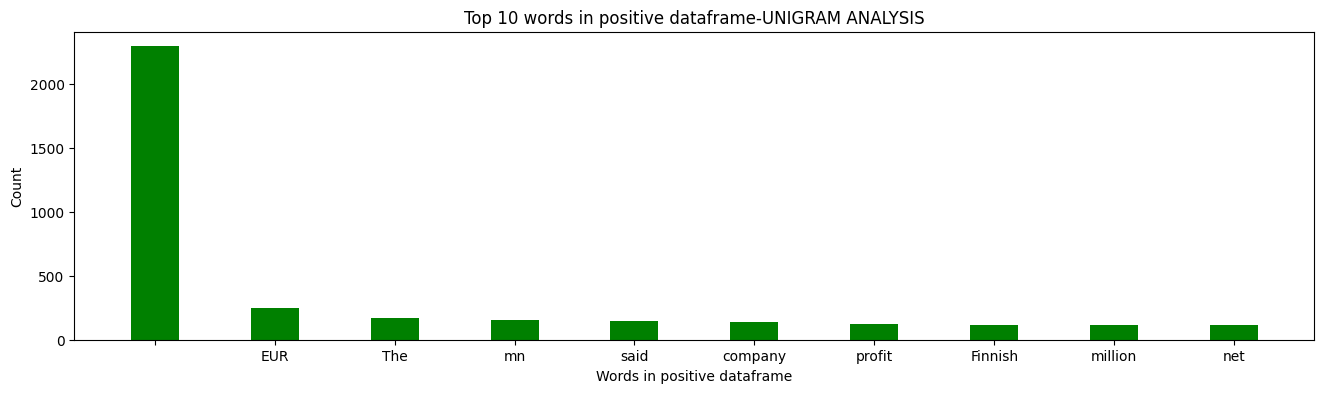

In [33]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

In [34]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [35]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.neutral=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Dec', '11', '', '2008', '', 'Finnish', 'construction', 'engineering', 'company', 'Outotec', 'Oyj', '', 'OMX', '', 'OTE1V', '', 'said', 'today', 'EUR', '28', 'million', '', 'USD', '368', '', 'order', 'expand', 'phosphate', 'concentrator', 'Siilinjarvi', 'Norwegian', 'minera']
Sentence after removing stopwords: ['Satama', 'net', 'sales', 'would', 'higher', 'year', '']
Sentence after removing stopwords: ['The', '250', 'sq', '2691', 'sq', 'ft', 'store', 'Copenhagen', 'premier', 'shopping', 'district', 'inaugurated', 'today', '', 'strengthening', 'company', 'presence', 'Nordic', 'capitals', '']
Sentence after removing stopwords: ['MegaFon', 'subscriber', 'base', 'increased', '161', '', '2009', '505', 'million', 'users', 'December', '31', '', 'market', 'share', 'number', 'customers', 'amounted', '24', '', 'late', '2009', '', '23', '', 'late', '2008', '', 'according', 'TeliaSonera', 'estimates', '']
Sentence after removing stopwo

In [36]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.neutral=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['notified', 'result', 'Company', 'issuing', '14432000', 'new', 'shares', 'directed', 'offering', '', 'joint', 'holdings', 'Pequot', 'decreased', '110', '963', '', 'total', 'number', 'shares', 'votes', 'Company', '']
Sentence after removing stopwords: ['Finnish', 'technology', 'company', 'Raute', 'Corporation', '', 'OMX', 'Helsinki', '', 'RUTAV', '', 'issued', 'Tuesday', '', '23', 'September', '', 'profit', 'warning', 'financial', 'year', '2008', '']
Sentence after removing stopwords: ['Operating', 'profit', '12month', 'period', 'decreased', 'EUR17', '9', 'net', 'sales', 'increased', 'EUR58', '3', '', 'compared', '2007', '']
Sentence after removing stopwords: ['Finnish', 'investment', 'group', 'Norvestia', 'Oyj', 'said', 'net', 'profit', 'fell', '235', 'mln', 'euro', '', '306', 'mln', '2006', '335', 'mln', 'euro', '', '436', 'mln', '2005', '']
Sentence after removing stopwords: ['Kone', 'shares', 'dropped', '41', 'percent', '', 'x20ac', '43', 'US', '5

In [37]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.neutral=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['Eriikka', 'S¦derstr¦m', 'previously', 'held', 'several', 'positions', 'finance', 'control', 'Nokia', 'Networks', 'including', 'acting', 'Business', 'Group', 'Controller', 'corporate', 'controller', 'position', 'Nokia', 'Siemens', 'Networks', '']
Sentence after removing stopwords: ['', 'We', 'hope', 'clarify', 'policies', 'Finnish', 'businesses', 'gray', 'areas', '', '', 'Motlanthe', 'said', '']
Sentence after removing stopwords: ['Mreal', 'start', 'statutory', 'employeremployee', 'negotiations', 'Ænekoski', 'board', 'mill', 'concern', '130', 'people', '']
Sentence after removing stopwords: ['Bioheapleaching', 'makes', 'extraction', 'metals', 'low', 'grade', 'ore', 'economically', 'viable', '']
Sentence after removing stopwords: ['This', 'order', '', 'delivered', '', 'bring', 'total', 'output', 'electricity', 'Italy', 'generated', 'Wartsila', 'equipment', '1300', 'MW', '']
Sentence after removing stopwords: ['Tekla', 'Group', 'net', 'sales', '2005', 

In [38]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [39]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [40]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [41]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

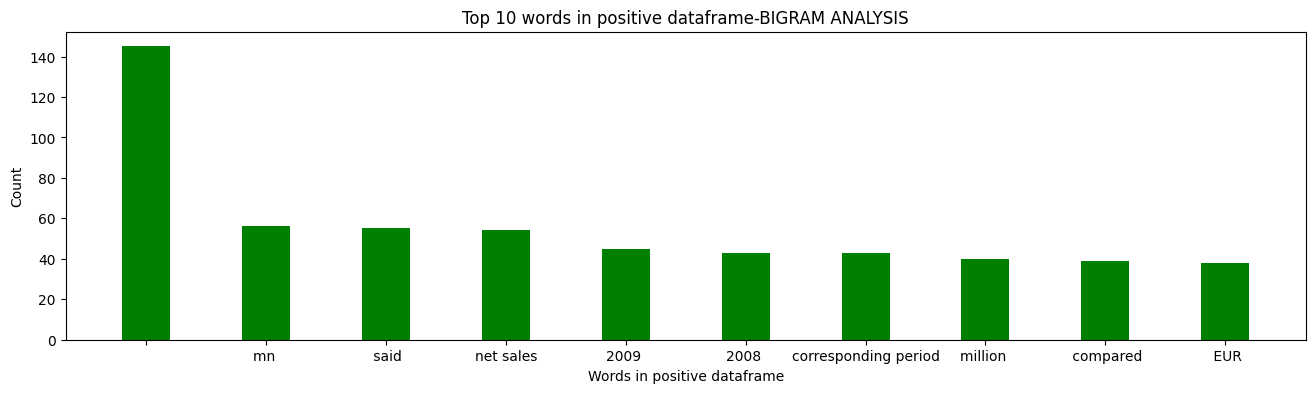

In [42]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Dec', '11', '', '2008', '', 'Finnish', 'construction', 'engineering', 'company', 'Outotec', 'Oyj', '', 'OMX', '', 'OTE1V', '', 'said', 'today', 'EUR', '28', 'million', '', 'USD', '368', '', 'order', 'expand', 'phosphate', 'concentrator', 'Siilinjarvi', 'Norwegian', 'minera']
Sentence after removing stopwords: ['Satama', 'net', 'sales', 'would', 'higher', 'year', '']
Sentence after removing stopwords: ['The', '250', 'sq', '2691', 'sq', 'ft', 'store', 'Copenhagen', 'premier', 'shopping', 'district', 'inaugurated', 'today', '', 'strengthening', 'company', 'presence', 'Nordic', 'capitals', '']
Sentence after removing stopwords: ['MegaFon', 'subscriber', 'base', 'increased', '161', '', '2009', '505', 'million', 'users', 'December', '31', '', 'market', 'share', 'number', 'customers', 'amounted', '24', '', 'late', '2009', '', '23', '', 'late', '2008', '', 'according', 'TeliaSonera', 'estimates', '']
Sentence after removing stopwo

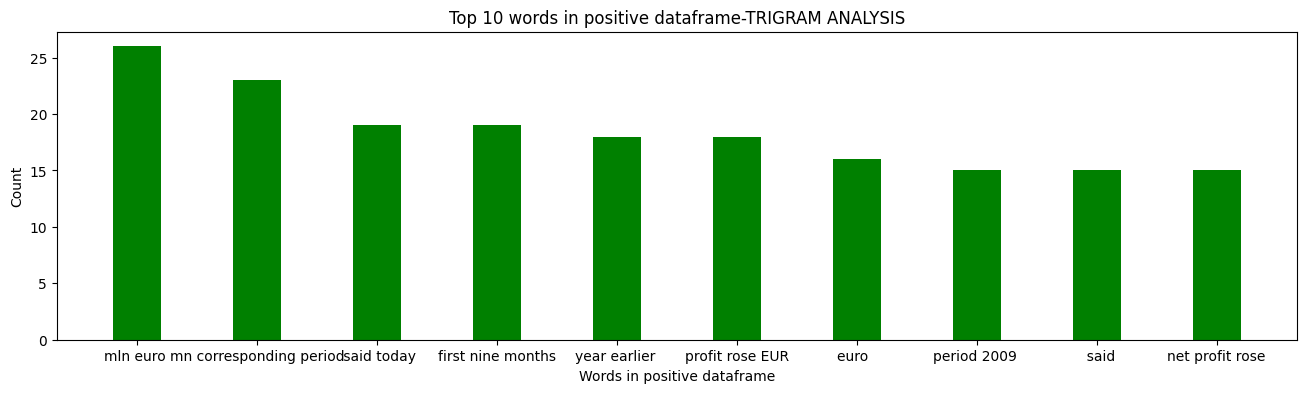

In [44]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.neutral=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.neutral=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.neutral=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()